In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

recipes=pd.read_csv('/content/recipes_muffins_cupcakes.csv')
recipes.head()
recipes.shape

(20, 9)

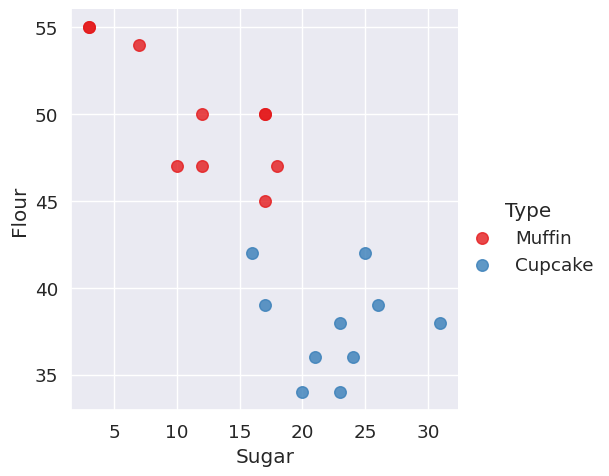

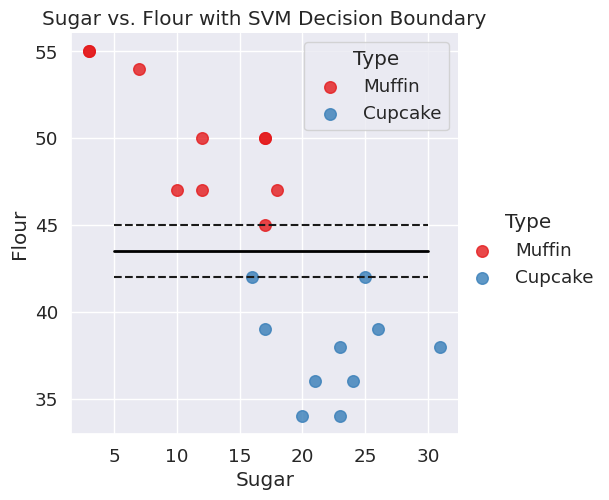

In [ ]:
# @title Default title text
sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type', palette='Set1', fit_reg=False,
           scatter_kws={"s": 70})

sugar_butter = recipes[['Sugar', 'Flour']].values
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)

model = svm.SVC(kernel='linear')
model.fit(sugar_butter, type_label)

# Get the separating hyperplane
w = model.coef_[0]  # separating the hyperplane
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0] / w[1])

# Plot the hyperplane
b = model.support_vectors_[0]  # plot to separate hyperplane that passes
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Re-plot with decision boundaries
sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type', palette='Set1', fit_reg=False,
           scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, -1], s=80, facecolor='none')

plt.xlabel('Sugar')
plt.ylabel('Flour')
plt.title('Sugar vs. Flour with SVM Decision Boundary')
plt.legend(title='Type')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test = train_test_split(sugar_butter,type_label,test_size=0.2)
model1=svm.SVC(kernel='linear')
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(pred,"\n")
print(confusion_matrix(y_test,pred),"\n")
print(classification_report(y_test,pred))

[1 0 0 1] 

[[2 0]
 [0 2]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

